# 다층 퍼셉트론으로 MNIST 분류

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [66]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [67]:
print(mnist.data.shape)
print(mnist.target[0])

(70000, 784)
5


In [68]:
mnist.target = mnist.target.astype(np.int64)

X = mnist.data / 255
X = X.to_numpy()
y = mnist.target
y = y.to_numpy()

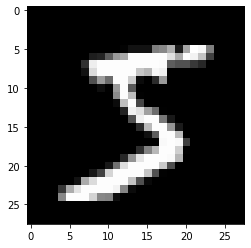

In [69]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.show()

In [70]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=True)

In [72]:
model = torch.nn.Sequential()
model.add_module('fc1', torch.nn.Linear(28*28*1, 100))
model.add_module('relu1', torch.nn.ReLU())
model.add_module('fc2', torch.nn.Linear(100, 100))
model.add_module('relu2', torch.nn.ReLU())
model.add_module('fc3', torch.nn.Linear(100, 10))
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [73]:
from torch import optim

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [74]:
def train(epoch):
    model.train() # 신경망을 학습 모드로 전환

    for data, target in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, target.long())
        loss.backward()
        optimizer.step()

    print('Epoch {} 완료\n'.format(epoch))

def test():
    model.eval() # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론 수행
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블
            correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우 카운트 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)
    print('\n테스트 데이터 예측 정확도: {}/{} ({:.0f}%)\n'.format(
        correct, data_num, 100. * correct / data_num))
    

In [75]:
test()


테스트 데이터 예측 정확도: 1547/14000 (11%)



In [76]:
for epoch in range(3):
    train(epoch)
test()

Epoch 0 완료

Epoch 1 완료

Epoch 2 완료


테스트 데이터 예측 정확도: 13563/14000 (97%)



예측 결과:9
정답: tensor(9.)


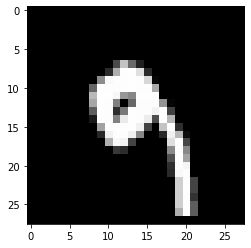

In [79]:
index = 2021

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print('예측 결과:{}'.format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print('정답:', y_test[index])
plt.show()